In [1]:
import csv
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense ,Lambda , Conv2D, MaxPooling2D ,Dropout , Cropping2D


import tensorflow as tf
from numba import cuda 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


import sklearn
from tensorflow.keras.preprocessing.image import ImageDataGenerator

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)

#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))




def load(samples):
    
    if True: 
        num_samples = len(samples)

        images = []
        measurements = []
        Correction = 0.2

        #for offset in range(0, num_samples, batch_size):
        if True:
            for line in samples :
                source_path = line[0]
                filename = source_path.split('/')[-1]
                current_path = 'data/IMG/' + filename
                image = cv2.imread(current_path)   
                images.append(image)
                measurement = float(line[3])
                measurements.append(measurement)


                image_flipped = np.fliplr(image)
                images.append(image_flipped)    
                measurement_flipped = (-1) * measurement
                measurements.append(measurement_flipped)


                source_pathL = line[1]
                filenameL = source_pathL.split('/')[-1]
                current_pathL = 'data/IMG/' + filenameL
                imageL = cv2.imread(current_pathL)   
                images.append(imageL)
                measurements.append(measurement + Correction)

                image_flippedL = np.fliplr(imageL)
                images.append(image_flippedL)    
                measurement_flippedL = ((-1) * (measurement + Correction))
                measurements.append(measurement_flipped)



                source_pathR = line[2]
                filenameR = source_pathR.split('/')[-1]
                current_pathR = 'data/IMG/' + filenameR
                imageR = cv2.imread(current_pathR)   
                images.append(imageR)
                measurements.append(measurement - Correction)

                image_flippedR = np.fliplr(imageR)
                images.append(image_flippedR)    
                measurement_flippedR = ((-1) * (measurement - Correction))
                measurements.append(measurement_flipped)


            X_train = np.array(images)
            y_train = np.array(measurements)
            
            return X_train , y_train
            




            

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

# compile and train the model using the generator function

X_train , y_train =  load(lines)

model = Sequential()

model.add(Cropping2D(cropping=((70,25),(0,0)) ,  input_shape = (160,320,3)))

model.add(Lambda(lambda x: (x / 255) - 0.5 ))

model.add(Conv2D(24, kernel_size=(5, 5),activation='relu'))

model.add(Conv2D(36, kernel_size=(5, 5),activation='relu'))

model.add(Conv2D(48, kernel_size=(5, 5),activation='relu'))

#model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))

#model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))

#model.add(Conv2D(16, kernel_size=(5, 5),activation='relu'))

#MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)


model.add(Flatten())

model.add(Dense(100))

model.add(Dense(50))

model.add(Dense(10))


model.add(Dense(1))

model.compile(loss='mse' , optimizer = 'adam')

history_object = model.fit(X_train,y_train,validation_split = 0.2 ,shuffle = True , epochs = 3)

#history_object = model.fit_generator(train_generator, samples_per_epoch= 
#            len(X_train), validation_data=validation_generator, 
#            nb_val_samples=len(y_train), nb_epoch=3)

#history_object = model.fit_generator(train_generator, steps_per_epoch= (len(train)*6)//BS,
#validation_data=validation_generator, validation_steps=(len(valid)*6)//BS, epochs=3, verbose = 1,workers=1)

#H = model.fit_generator(datagen.flow(X_train, y_train, batch_size=BS),
#    steps_per_epoch=len(X_train) // BS,
#    epochs=3)

model.save('model.h5')




### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


#clear memory
device = cuda.get_current_device()
device.reset()



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 59284 samples, validate on 14822 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/3
   32/59284 [..............................] - ETA: 5:12:10 - loss: 0.0263

KeyboardInterrupt: 

In [2]:
#clear memory
from numba import cuda 

device = cuda.get_current_device()
device.reset()



In [3]:
aug.flow()

NameError: name 'aug' is not defined

In [2]:
import csv
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten , Dense ,Lambda , Conv2D, MaxPooling2D ,Dropout , Cropping2D


import tensorflow as tf
from numba import cuda 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


import sklearn

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)

#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))




def generator(samples, batch_size=32):
    
    while 1: # Loop forever so the generator never terminates
        samples = sklearn.utils.shuffle(samples)
        num_samples = len(samples)

        images = []
        measurements = []
        Correction = 0.2

        for offset in range(0, num_samples, batch_size):

            for line in samples[offset:(offset+batch_size)] :
                source_path = line[0]
                filename = source_path.split('/')[-1]
                current_path = 'data/IMG/' + filename
                image = cv2.imread(current_path)   
                images.append(image)
                measurement = float(line[3])
                measurements.append(measurement)


                image_flipped = np.fliplr(image)
                images.append(image_flipped)    
                measurement_flipped = (-1) * measurement
                measurements.append(measurement_flipped)


                source_pathL = line[1]
                filenameL = source_pathL.split('/')[-1]
                current_pathL = 'data/IMG/' + filenameL
                imageL = cv2.imread(current_pathL)   
                images.append(imageL)
                measurements.append(measurement + Correction)

                image_flippedL = np.fliplr(imageL)
                images.append(image_flippedL)    
                measurement_flippedL = ((-1) * (measurement + Correction))
                measurements.append(measurement_flipped)



                source_pathR = line[2]
                filenameR = source_pathR.split('/')[-1]
                current_pathR = 'data/IMG/' + filenameR
                imageR = cv2.imread(current_pathR)   
                images.append(imageR)
                measurements.append(measurement - Correction)

                image_flippedR = np.fliplr(imageR)
                images.append(image_flippedR)    
                measurement_flippedR = ((-1) * (measurement - Correction))
                measurements.append(measurement_flipped)


            X_train = np.array(images)
            y_train = np.array(measurements)
            X_train , y_train = sklearn.utils.shuffle(X_train, y_train)
            
            yield (X_train , y_train) 
            




            

lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

# compile and train the model using the generator function

samples_num = len(lines)
ratio = 0.8
BS = 8


train = lines[0:int(ratio * samples_num)]

valid = lines[int(ratio * samples_num):]


train_generator =  generator(train, batch_size=BS)

validation_generator = generator(valid, batch_size=BS)


#datagen =ImageDataGenerator(validation_split = 0.2)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(X_train)

model = Sequential()

model.add(Cropping2D(cropping=((70,25),(0,0)) ,  input_shape = (160,320,3)))

model.add(Lambda(lambda x: (x / 255) - 0.5 ))

model.add(Conv2D(24, kernel_size=(5, 5),activation='relu'))

#model.add(Conv2D(36, kernel_size=(5, 5),activation='relu'))

#model.add(Conv2D(48, kernel_size=(5, 5),activation='relu'))

#model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))

#model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))

#model.add(Conv2D(16, kernel_size=(5, 5),activation='relu'))

#MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)


model.add(Flatten())

#model.add(Dense(100))

#model.add(Dense(50))

#model.add(Dense(10))


model.add(Dense(1))

model.compile(loss='mse' , optimizer = 'adam')

#history_object = model.fit(X_train,y_train,validation_split = 0.2 ,shuffle = True , epochs = 3)

#history_object = model.fit_generator(train_generator, samples_per_epoch= 
#            len(X_train), validation_data=validation_generator, 
#            nb_val_samples=len(y_train), nb_epoch=3)

history_object = model.fit_generator(train_generator, steps_per_epoch= (len(train)*6)//BS,
validation_data=validation_generator, validation_steps=(len(valid)*6)//BS, epochs=3,verbose = 3 #pickle_safe=True
                                     , max_queue_size=10,use_multiprocessing=True,workers=6)




#max_queue_size=10,,,
#H = model.fit_generator(datagen.flow(X_train, y_train, batch_size=BS),
#    steps_per_epoch=len(X_train) // BS,
#    epochs=3)

model.save('model.h5')




### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


#clear memory
device = cuda.get_current_device()
device.reset()



Instructions for updating:
Use tf.cast instead.
Epoch 1/3


/home/ahmatronics/anaconda3/lib/python3.7/site-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the `keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'
/home/ahmatronics/anaconda3/lib/python3.7/site-packages/keras/utils/data_utils.py:718: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


KeyboardInterrupt: 

In [4]:

import keras
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, files, batch_size=2, dim=(160, 160), n_channels=3,
                 n_classes=2, shuffle=False):
        'Initialization'
        self.dim = dim
        self.files = files
        self.batch_size = batch_size
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.len = int(np.floor(len(self.files)/ self.batch_size))


    def __len__(self):
        'Denotes the number of batches per epoch'
        print ("Number of batches per epoch")
        print(self.len)
        return self.len
    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        files_temp = [self.files[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(files_temp)

        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.files)*6)
        if self.shuffle == True:
            np.random.shuffle(self.indexes)


    def __data_generation(self, files_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        samples = files_temp
        num_samples = len(samples)
        images = []
        measurements = []
        Correction = 0.2
        
        for line in samples:
            source_path = line[0]
            filename = source_path.split('/')[-1]
            current_path = 'data/IMG/' + filename
            image = cv2.imread(current_path)   
            images.append(image)
            measurement = float(line[3])
            measurements.append(measurement)


            image_flipped = np.fliplr(image)
            images.append(image_flipped)    
            measurement_flipped = (-1) * measurement
            measurements.append(measurement_flipped)


            source_pathL = line[1]
            filenameL = source_pathL.split('/')[-1]
            current_pathL = 'data/IMG/' + filenameL
            imageL = cv2.imread(current_pathL)   
            images.append(imageL)
            measurements.append(measurement + Correction)

            image_flippedL = np.fliplr(imageL)
            images.append(image_flippedL)    
            measurement_flippedL = ((-1) * (measurement + Correction))
            measurements.append(measurement_flipped)



            source_pathR = line[2]
            filenameR = source_pathR.split('/')[-1]
            current_pathR = 'data/IMG/' + filenameR
            imageR = cv2.imread(current_pathR)   
            images.append(imageR)
            measurements.append(measurement - Correction)

            image_flippedR = np.fliplr(imageR)
            images.append(image_flippedR)    
            measurement_flippedR = ((-1) * (measurement - Correction))
            measurements.append(measurement_flipped)


            X_train = np.array(images)
            y_train = np.array(measurements)
            X_train , y_train = sklearn.utils.shuffle(X_train, y_train)
            self.len = int(np.floor(len(images)))
            
        return X, y #keras.utils.to_categorical(y, num_classes=self.n_classes)


...

params = {'dim': (160, 160),
              'batch_size': 2,
              'n_classes': 2,
              'n_channels': 3,
              'shuffle': True}


gen_train = DataGenerator(files, **params)
model.fit_generator(gen_train, steps_per_epoch=ceil(num_samples_train)/batch_size, validation_data=None,
        epochs = 1,  verbose=1,
    callbacks = [tensorboard])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Number of batches per epoch
154

Instructions for updating:
Use tf.cast instead.
Number of batches per epoch
154

Number of batches per epoch
1389
Epoch 1/3

1388/1389 [============================>.] - ETA: 0s - loss: 0.0609Number of batches per epoch
1389

Number of batches per epoch
154

1389/1389 [==============================] - 241s 173ms/step - loss: 0.0609 - val_loss: 0.0139
Epoch 2/3
1388/1389 [============================>.] - ETA: 0s - loss: 0.0276Number of batches per epoch
1389

Number of batches per epoch
154

1389/1389 [==============================] - 239s 172ms/step - loss: 0.0276 - val_loss: 0.0423
Epoch 3/3
1388/1389 [============================>.] - ETA: 0s - loss: 0.0276Number of batches per epoch
1389

Number of batches per epoch
154

1389/1389 [==============================] - 239s 172ms/step - loss: 0.0276 - val_loss: 0.0537
dict_keys(['val_loss', 'loss'])


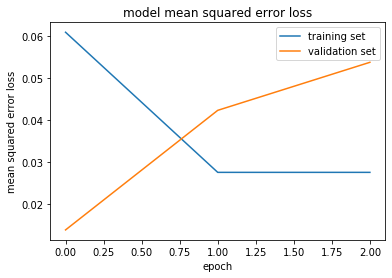

In [1]:
import csv
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten , Dense ,Lambda , Conv2D, MaxPooling2D ,Dropout , Cropping2D


import tensorflow as tf
from numba import cuda 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard

import sklearn

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)

#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))




import keras
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, files, batch_size=2, dim=(160, 160), n_channels=3,shuffle=False):
        'Initialization'
        self.dim = dim
        self.files = files
        self.batch_size = int(batch_size / 6) # because each line of data generates 6 photos and an angle
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()
        self.len = int(np.floor(len(self.files) / self.batch_size)) 


    def __len__(self):
        'Denotes the number of batches per epoch'
        print()
        print ("Number of batches per epoch" , self.len)
        print()
        return self.len
    
    
    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        files_temp = [self.files[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(files_temp)

        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.files))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)


    def __data_generation(self, files_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        samples = files_temp
        num_samples = len(samples)
        images = []
        measurements = []
        Correction = 0.2
        
        for line in samples:
            source_path = line[0]
            filename = source_path.split('/')[-1]
            current_path = 'data/IMG/' + filename
            image = cv2.imread(current_path)   
            images.append(image)
            measurement = float(line[3])
            measurements.append(measurement)

            
            
            image_flipped = np.fliplr(image)
            images.append(image_flipped)    
            measurement_flipped = (-1) * measurement
            measurements.append(measurement_flipped)


            source_pathL = line[1]
            filenameL = source_pathL.split('/')[-1]
            current_pathL = 'data/IMG/' + filenameL
            imageL = cv2.imread(current_pathL)   
            images.append(imageL)
            measurements.append(measurement + Correction)

            image_flippedL = np.fliplr(imageL)
            images.append(image_flippedL)    
            measurement_flippedL = ((-1) * (measurement + Correction))
            measurements.append(measurement_flipped)



            source_pathR = line[2]
            filenameR = source_pathR.split('/')[-1]
            current_pathR = 'data/IMG/' + filenameR
            imageR = cv2.imread(current_pathR)   
            images.append(imageR)
            measurements.append(measurement - Correction)

            image_flippedR = np.fliplr(imageR)
            images.append(image_flippedR)    
            measurement_flippedR = ((-1) * (measurement - Correction))
            measurements.append(measurement_flipped)


            
            
        images = np.array(images)
        measurements = np.array(measurements)
        X, Y = sklearn.utils.shuffle(images, measurements)
        return  X, Y  #keras.utils.to_categorical(y, num_classes=self.n_classes)


...



lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

# compile and train the model using the generator function

samples_num = len(lines)
ratio = 0.9


train = lines[0:int(ratio * samples_num)]

valid = lines[int(ratio * samples_num):]

params = {'dim': (160,320),
              'batch_size': 48,
              'n_channels': 3,
              'shuffle': True}

            
train_generator =  DataGenerator(train,**params)

validation_generator = DataGenerator(valid, **params)


#datagen =ImageDataGenerator(validation_split = 0.2)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
#datagen.fit(X_train)

model = Sequential()

model.add(Cropping2D(cropping=((70,25),(0,0)) ,  input_shape = (160,320,3)))

model.add(Lambda(lambda x: (x / 127.5) - 1 ))

model.add(Conv2D(24, kernel_size=(5, 5),activation='relu'))

model.add(Conv2D(36, kernel_size=(5, 5),activation='relu'))

model.add(Conv2D(48, kernel_size=(5, 5),activation='relu'))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))

model.add(Conv2D(16, kernel_size=(5, 5),activation='relu'))

#MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)


model.add(Flatten())

model.add(Dense(100))

model.add(Dense(50))

model.add(Dense(10))


model.add(Dense(1))

model.compile(loss='mse' , optimizer = 'adam')

#history_object = model.fit(X_train,y_train,validation_split = 0.2 ,shuffle = True , epochs = 3)

#history_object = model.fit_generator(train_generator, samples_per_epoch= 
#            len(X_train), validation_data=validation_generator, 
#            nb_val_samples=len(y_train), nb_epoch=3)

history_object = model.fit_generator(train_generator, steps_per_epoch= train_generator.len ,
validation_data=validation_generator, validation_steps=validation_generator.len, epochs=3,verbose = 1) #pickle_safe=True
                                     #, max_queue_size=10,use_multiprocessing=True,workers=10)


#history_object = model.fit_generator(train_generator, steps_per_epoch=train_generator.len, validation_data=None,
#        epochs = 1,  verbose=1,
#    callbacks = [TensorBoard])

#max_queue_size=10,,,
#H = model.fit_generator(datagen.flow(X_train, y_train, batch_size=BS),
#    steps_per_epoch=len(X_train) // BS,
#    epochs=3)

model.save('model.h5')




### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


#clear memory
device = cuda.get_current_device()
device.reset()



In [1]:
import csv
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten , Dense ,Lambda , Conv2D, MaxPooling2D ,Dropout , Cropping2D


import tensorflow as tf
from numba import cuda 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard

import sklearn

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#session = tf.Session(config=config)

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.8)

sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))




import keras
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, files, batch_size=2, dim=(160, 160), n_channels=3,shuffle=False):
        'Initialization'
        self.dim = dim
        self.files = files
        self.batch_size = int(batch_size / 2) # because each line of data generates 2 photos and an angle
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()
        self.len = int(np.floor(len(self.files) / self.batch_size)) 


    def __len__(self):
        'Denotes the number of batches per epoch'
        print()
        print ("Number of batches per epoch" , self.len)
        print()
        return self.len
    
    
    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        files_temp = [self.files[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(files_temp)

        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.files))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)


    def __data_generation(self, files_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        samples = files_temp
        num_samples = len(samples)
        images = []
        measurements = []
        Correction = 0.2
        
        for line in samples:
            source_path = line[0]
            filename = source_path.split('/')[-1]
            current_path = 'data/IMG/' + filename
            image = cv2.imread(current_path)   
            images.append(image)
            measurement = float(line[3])
            measurement *= 100  #############################################################
            measurements.append(measurement)

            image_flipped = np.fliplr(image)
            images.append(image_flipped)    
            measurement_flipped = (-1) * measurement
            measurements.append(measurement_flipped)            

            source_pathL = line[1]
            filenameL = source_pathL.split('/')[-1]
            current_pathL = 'data/IMG/' + filenameL
            imageL = cv2.imread(current_pathL)   
            images.append(imageL)
            measurements.append(measurement + Correction)

            image_flippedL = np.fliplr(imageL)
            images.append(image_flippedL)    
            measurement_flippedL = ((-1) * (measurement + Correction))
            measurements.append(measurement_flipped)



            source_pathR = line[2]
            filenameR = source_pathR.split('/')[-1]
            current_pathR = 'data/IMG/' + filenameR
            imageR = cv2.imread(current_pathR)   
            images.append(imageR)
            measurements.append(measurement - Correction)

            image_flippedR = np.fliplr(imageR)
            images.append(image_flippedR)    
            measurement_flippedR = ((-1) * (measurement - Correction))
            measurements.append(measurement_flipped)


        images = np.array(images)
        measurements = np.array(measurements)
        X, Y = sklearn.utils.shuffle(images, measurements)
        return  X, Y  #keras.utils.to_categorical(y, num_classes=self.n_classes)

   

...



lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

# compile and train the model using the generator function

samples_num = len(lines)
ratio = 0.8


lines = sklearn.utils.shuffle(lines)

train = lines[0:int(ratio * samples_num)]

valid = lines[int(ratio * samples_num):]

params = {'dim': (160,320),
              'batch_size': 32,
              'n_channels': 3,
              'shuffle': True}

            
train_generator =  DataGenerator(train,**params)

validation_generator = DataGenerator(valid, **params)



model = Sequential()

model.add(Cropping2D(cropping=((70,25),(0,0)) ,  input_shape = (160,320,3)))

model.add(Lambda(lambda x: (x / 127.5) - 1. ))

model.add(Conv2D(24, kernel_size=(5, 5),activation='relu'))

model.add(Conv2D(36, kernel_size=(5, 5),activation='relu'))

model.add(Conv2D(48, kernel_size=(3, 3),activation='relu'))

#model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))

#model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))

#model.add(Dropout(0.2))

model.add(Conv2D(16, kernel_size=(5, 5),activation='relu'))

#MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)


model.add(Flatten())


model.add(Dense(500))


model.add(Dense(100))



model.add(Dense(50))



model.add(Dense(10))


model.add(Dense(1))

#adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='mse' , optimizer = 'adam')


history_object = model.fit_generator(train_generator, steps_per_epoch= train_generator.len ,
validation_data=validation_generator, validation_steps=validation_generator.len, epochs=6,verbose = 1 , workers=16
                                    ,max_queue_size=10) 



model.save('model.h5')

print('Model Saved')


### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


#clear memory
device = cuda.get_current_device()
device.reset()

print('Cuda reset')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.

Number of batches per epoch 21

Instructions for updating:
Use tf.cast instead.


KeyboardInterrupt: 

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.

Number of batches per epoch 56



Number of batches per epoch 226

Epoch 1/6Number of batches per epoch
 56

  1/226 [..............................] - ETA: 14:07 - loss: 424.4799

ResourceExhaustedError: OOM when allocating tensor with shape[998784,100] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_1/Adam/gradients/dense_1/MatMul_grad/MatMul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
